# Data Analytics:Weather Forecasting

Data Cleaning

Importing all libraries

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import gc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut

In [2]:
df=pd.read_csv("C:/Users/rtd91/OneDrive/Syracuse University/IST 707/Homework2/Weather Forecast Training.csv")

In [3]:
df.head(6)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No
5,MelbourneAirport,6.6,16.3,8.4,3.4,6.9,S,50.0,S,30.0,55.0,1021.4,7.0,14.6,Yes,No


In [4]:
df.shape

(51978, 16)

# Checking for null values and replacing them 

In [5]:
df.isnull().sum() #checking which columns has how many null values

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

In [6]:
df['MinTemp']=df['MinTemp'].fillna(value=np.mean(df['MinTemp'])) #replacing NA with mean value

In [7]:
df['MaxTemp']=df['MaxTemp'].fillna(value=np.mean(df['MaxTemp'])) #replacing NA with mean value

In [8]:
df['Rainfall']=df['Rainfall'].fillna(value=np.mean(df['Rainfall'])) #replacing NA with mean value

In [9]:
df['Evaporation']=df['Evaporation'].fillna(value=np.mean(df['Evaporation'])) #replacing NA with mean value

In [10]:
df['Sunshine']=df['Sunshine'].fillna(value=np.mean(df['Sunshine'])) #replacing NA with mean value

In [11]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(value=np.mean(df['WindGustSpeed'])) #replacing NA with mean value

In [12]:
df['WindSpeed']=df['WindSpeed'].fillna(value=np.mean(df['WindSpeed'])) #replacing NA with mean value

In [13]:
df['Humidity']=df['Humidity'].fillna(value=np.mean(df['Humidity'])) #replacing NA with mean value

In [14]:
df['Pressure']=df['Pressure'].fillna(value=np.mean(df['Pressure'])) #replacing NA with mean value

In [15]:
df['Temp']=df['Temp'].fillna(value=np.mean(df['Temp'])) #replacing NA with mean value

In [16]:
df.WindGustDir.value_counts() #tabulating all the values to find the mode
df['WindGustDir']=df['WindGustDir'].fillna(value="W") #replacing NA values of categorical variable with mode

In [17]:
df.WindDir.value_counts() #tabulating all the values to find the mode
df['WindDir']=df['WindDir'].fillna(value="W") #replacing NA values of categorical variable with mode

In [18]:
df.Cloud.value_counts() #tabulating all the values to find the mode
df['Cloud']=df['Cloud'].fillna(value=7.0) #replacing NA values of categorical variable with mode

In [19]:
df.RainToday.value_counts() #tabulating all the values to find the mode
df['RainToday']=df['RainToday'].fillna(value="Yes") #replacing NA values of categorical variable with mode

# Pre-processing: Checking for duplicated rows

In [20]:
duplicateRows = df[df.duplicated()] #Finding Repeated values
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows)

Duplicate Rows except first occurrence based on all columns are :
        Location    MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
9832   Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
9935   Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
12639  Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
13444  Newcastle  12.549174  27.200000  0.000000      5.17757   6.53058   
13972  Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
20638  Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
22343  Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
27894  Newcastle  12.549174  22.512698  3.639494      5.17757   6.53058   
29722  Newcastle  12.549174  20.000000  0.000000      5.17757   6.53058   
31485  Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
32409  Newcastle  12.549174  22.512698  0.000000      5.17757   6.53058   
35050  Newcastle  12.549174  25.20

# Pre-processing: Checking for Outliers

Visualizing the outliers and replacing them with appropriate values

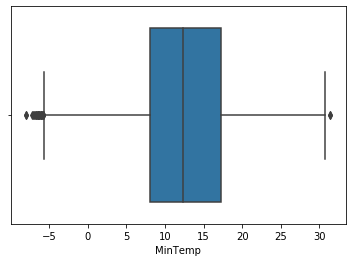

In [21]:
sns.boxplot(x=df['MinTemp'])
#df.MinTemp[df.MinTemo>100]=np.median(df.TotalWorkingYears)

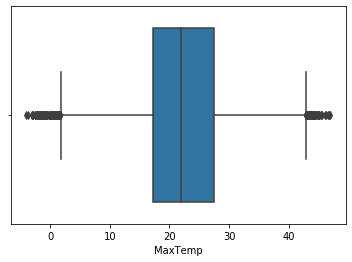

In [22]:
sns.boxplot(x=df['MaxTemp'])

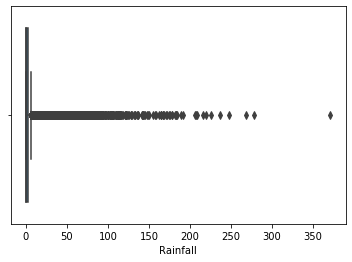

In [23]:
sns.boxplot(x=df['Rainfall'])

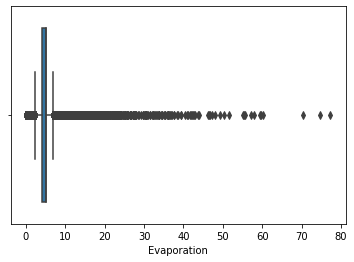

In [24]:
sns.boxplot(x=df['Evaporation'])

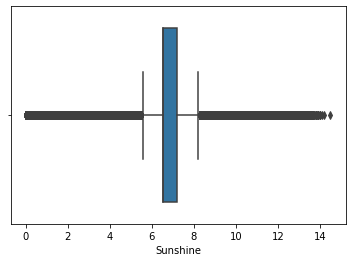

In [25]:
sns.boxplot(x=df['Sunshine'])

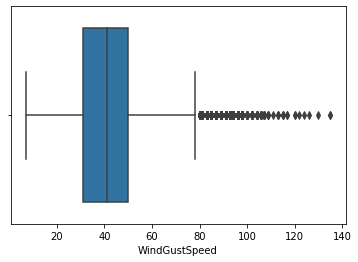

In [26]:
sns.boxplot(x=df['WindGustSpeed'])

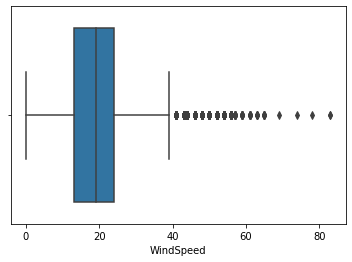

In [27]:
sns.boxplot(x=df['WindSpeed'])

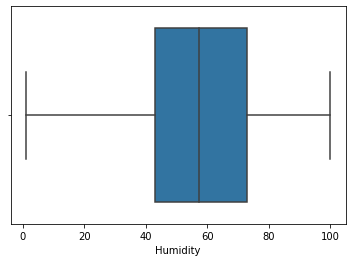

In [28]:
sns.boxplot(x=df['Humidity'])

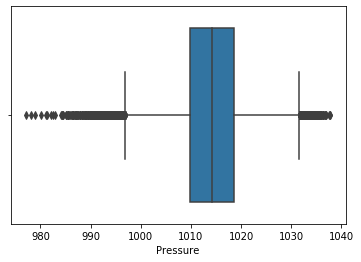

In [29]:
sns.boxplot(x=df['Pressure'])

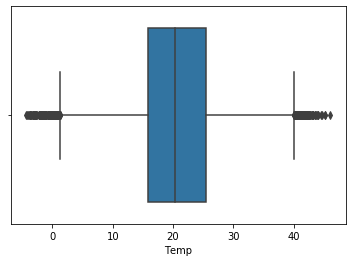

In [30]:
sns.boxplot(x=df['Temp'])

In [31]:
df1=pd.read_csv("C:/Users/rtd91/OneDrive/Syracuse University/IST 707/Homework2/Weather Forecast Testing.csv")

In [32]:
df1.head(5)

,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,1,Perth,15.3,21.5,4.4,2.4,1.4,NW,70.0,W,22.0,69.0,997.6,7.0,19.8,Yes
1,2,Portland,7.1,11.0,38.8,1.2,5.8,SSE,48.0,SW,19.0,46.0,1014.0,4.0,10.7,Yes
2,3,Hobart,3.6,16.6,0.2,2.8,9.3,NW,37.0,N,15.0,48.0,1016.6,5.0,15.4,No
3,4,Woomera,17.6,37.4,0.0,34.0,NaN,NNW,37.0,NW,19.0,11.0,1010.4,2.0,34.6,No
4,5,Townsville,11.4,25.6,0.0,6.0,2.8,ESE,31.0,SSE,13.0,52.0,1016.4,7.0,24.3,No


In [33]:
df1.isnull().sum() #checking which columns has how many null values

ID                  0
Location            0
MinTemp            47
MaxTemp            18
Rainfall          161
Evaporation      5516
Sunshine         6094
WindGustDir       929
WindGustSpeed     920
WindDir           387
WindSpeed         261
Humidity          349
Pressure         1293
Cloud            5020
Temp              267
RainToday         161
dtype: int64

In [34]:
df1['MinTemp']=df1['MinTemp'].fillna(value=np.mean(df1['MinTemp'])) #replacing NA with mean value

In [35]:
df1['MaxTemp']=df1['MaxTemp'].fillna(value=np.mean(df1['MaxTemp'])) #replacing NA with mean value

In [36]:
df1['Rainfall']=df1['Rainfall'].fillna(value=np.mean(df1['Rainfall'])) #replacing NA with mean value

In [37]:
df1['Evaporation']=df1['Evaporation'].fillna(value=np.mean(df1['Evaporation'])) #replacing NA with mean value

In [38]:
df1['Sunshine']=df1['Sunshine'].fillna(value=np.mean(df1['Sunshine'])) #replacing NA with mean value

In [39]:
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(value=np.mean(df1['WindGustSpeed'])) #replacing NA with mean value

In [40]:
df1['WindSpeed']=df1['WindSpeed'].fillna(value=np.mean(df1['WindSpeed'])) #replacing NA with mean value

In [41]:
df1['Humidity']=df1['Humidity'].fillna(value=np.mean(df1['Humidity'])) #replacing NA with mean value

In [42]:
df1['Pressure']=df1['Pressure'].fillna(value=np.mean(df1['Pressure'])) #replacing NA with mean value

In [43]:
df1['Temp']=df1['Temp'].fillna(value=np.mean(df1['Temp'])) #replacing NA with mean value

In [44]:
df1.WindGustDir.value_counts() #tabulating all the values to find the mode
df1['WindGustDir']=df1['WindGustDir'].fillna(value="W") #replacing NA values of categorical variable with mode

In [45]:
df1.WindDir.value_counts() #tabulating all the values to find the mode
df1['WindDir']=df1['WindDir'].fillna(value="W") #replacing NA values of categorical variable with mode

In [46]:
df1.Cloud.value_counts() #tabulating all the values to find the mode
df1['Cloud']=df1['Cloud'].fillna(value=7.0) #replacing NA values of categorical variable with mode

In [47]:
df1.RainToday.value_counts() #tabulating all the values to find the mode
df1['RainToday']=df1['RainToday'].fillna(value="Yes") #replacing NA values of categorical variable with mode

In [48]:
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(df)
#df_normalized = pd.DataFrame(np_scaled, columns=df.columns, index=df.index)
#df_normalized.describe()

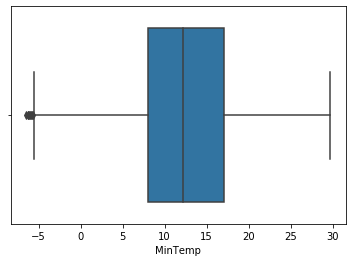

In [49]:
sns.boxplot(x=df1['MinTemp'])
#df.MinTemp[df.MinTemo>100]=np.median(df.TotalWorkingYears)

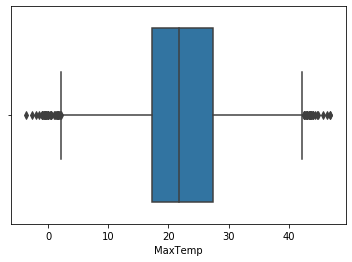

In [50]:
sns.boxplot(x=df1['MaxTemp'])

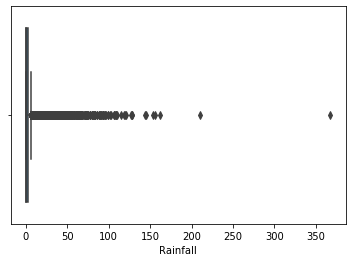

In [51]:
sns.boxplot(x=df1['Rainfall'])

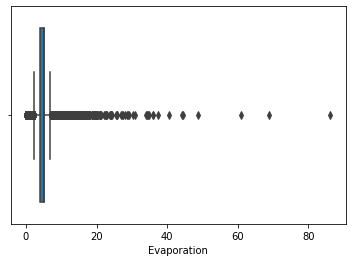

In [52]:
sns.boxplot(x=df1['Evaporation'])

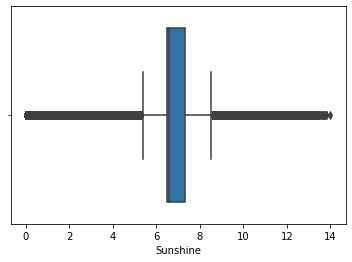

In [53]:
sns.boxplot(x=df1['Sunshine'])

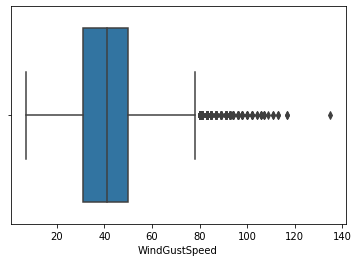

In [55]:
sns.boxplot(x=df1['WindGustSpeed'])

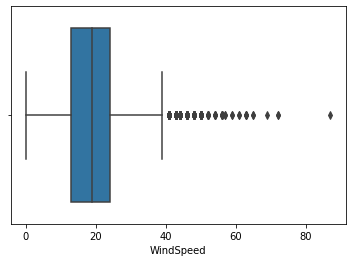

In [56]:
sns.boxplot(x=df1['WindSpeed'])

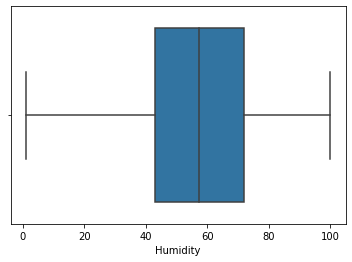

In [57]:
sns.boxplot(x=df1['Humidity'])

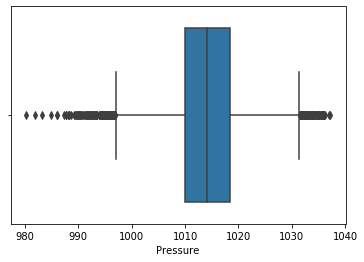

In [58]:
sns.boxplot(x=df1['Pressure'])

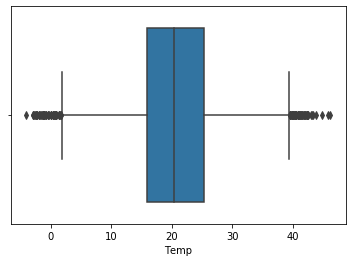

In [59]:
sns.boxplot(x=df1['Temp'])

# Including only the object type since we have to convert these categorical variables to numerical variables

In [180]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df1 = df1.select_dtypes(include=['object']).copy()

Making sure once again that we don't have any null values in these categorical variables

In [181]:
obj_df[obj_df.isnull().any(axis=1)] 

,Location,WindGustDir,WindDir,RainToday,RainTomorrow


In [182]:
obj_df["Location"].value_counts()

Portland            1291
MountGambier        1276
Cairns              1263
Darwin              1262
Sydney              1257
Witchcliffe         1235
Walpole             1231
Albany              1223
NorfolkIsland       1218
Dartmoor            1213
CoffsHarbour        1199
Canberra            1191
Brisbane            1188
Ballarat            1173
NorahHead           1173
Perth               1163
Wollongong          1158
Hobart              1141
Launceston          1140
GoldCoast           1133
Watsonia            1125
MountGinini         1125
Newcastle           1123
Adelaide            1108
SydneyAirport       1108
MelbourneAirport    1097
Sale                1077
Albury              1063
PerthAirport        1047
Penrith             1045
Bendigo             1035
Nuriootpa           1035
Richmond            1026
BadgerysCreek       1017
Tuggeranong         1000
Townsville           999
WaggaWagga           990
Williamtown          982
Cobar                980
PearceRAAF           974


In [183]:
a=obj_df["Location"].unique()

In [184]:
b=obj_df["WindGustDir"].unique()

In [185]:
c=obj_df["WindDir"].unique()

In [186]:
d=obj_df["RainToday"].unique()

In [187]:
e=obj_df["RainTomorrow"].unique()

In [188]:
np.count_nonzero(obj_df['Location'].unique())

49

str

(array([0], dtype=int64),)

In [64]:
obj_df["WindGustDir"].value_counts()

W      7408
N      3458
WSW    3315
S      3269
SE     3206
WNW    3197
SW     3175
NW     3161
SSE    3134
SSW    3119
E      2980
ENE    2693
NNW    2605
ESE    2479
NNE    2392
NE     2387
Name: WindGustDir, dtype: int64

In [65]:
obj_df["WindDir"].value_counts()

W      5260
SE     3687
S      3469
WSW    3455
WNW    3434
N      3388
NW     3356
SW     3273
SSE    3223
NNW    3001
SSW    2939
NE     2828
ESE    2815
E      2805
ENE    2645
NNE    2400
Name: WindDir, dtype: int64

In [66]:
obj_df["RainToday"].value_counts()

No     35544
Yes    16434
Name: RainToday, dtype: int64

In [67]:
obj_df["RainTomorrow"].value_counts()

No     26459
Yes    25519
Name: RainTomorrow, dtype: int64

In [189]:
numsreptrain = {"Location":{i:np.where(a==i)[0][0] for i in a},
          "WindGustDir":{i:np.where(b==i)[0][0] for i in b},
           "WindDir":{i:np.where(c==i)[0][0] for i in c},
           "RainToday":{i:np.where(d==i)[0][0] for i in d},
           "RainTomorrow":{i:np.where(e==i)[0][0] for i in e}}
                        

In [164]:
numsreptrain

{'Location': {'NorahHead': 0,
  'Nuriootpa': 1,
  'GoldCoast': 2,
  'Bendigo': 3,
  'Walpole': 4,
  'MelbourneAirport': 5,
  'Mildura': 6,
  'Williamtown': 7,
  'Watsonia': 8,
  'Nhil': 9,
  'MountGinini': 10,
  'Newcastle': 11,
  'BadgerysCreek': 12,
  'SydneyAirport': 13,
  'Tuggeranong': 14,
  'WaggaWagga': 15,
  'Hobart': 16,
  'Portland': 17,
  'AliceSprings': 18,
  'Brisbane': 19,
  'PerthAirport': 20,
  'Witchcliffe': 21,
  'Albany': 22,
  'Darwin': 23,
  'Ballarat': 24,
  'Canberra': 25,
  'MountGambier': 26,
  'Penrith': 27,
  'Townsville': 28,
  'Cairns': 29,
  'Sydney': 30,
  'Cobar': 31,
  'PearceRAAF': 32,
  'Adelaide': 33,
  'NorfolkIsland': 34,
  'Launceston': 35,
  'Woomera': 36,
  'Uluru': 37,
  'Albury': 38,
  'Dartmoor': 39,
  'SalmonGums': 40,
  'Richmond': 41,
  'Melbourne': 42,
  'CoffsHarbour': 43,
  'Perth': 44,
  'Wollongong': 45,
  'Moree': 46,
  'Sale': 47,
  'Katherine': 48},
 'WindGustDir': {'SSE': 0,
  'W': 1,
  'SE': 2,
  'WSW': 3,
  'NNE': 4,
  'S': 5,
 

In [190]:
#np.where(a=="Portland")
numsreptest = {"Location":{i:np.where(a==i)[0][0] for i in a},
          "WindGustDir":{i:np.where(b==i)[0][0] for i in b},
           "WindDir":{i:np.where(c==i)[0][0] for i in c},
           "RainToday":{i:np.where(d==i)[0][0] for i in d},
           "RainTomorrow":{i:np.where(e==i)[0][0] for i in e}}

In [207]:
df1.dtypes

ID                  int64
Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed     float64
WindDir            object
WindSpeed         float64
Humidity          float64
Pressure          float64
Cloud             float64
Temp              float64
RainToday          object
Locationint         int64
WindGustDirint      int64
WindDirint          int64
RainTodayint        int64
dtype: object

In [210]:
tempdf=df
tempdf1=df1

In [214]:
tempdf=tempdf.drop(["Location","WindGustDir","WindDir","RainToday","RainTomorrow"],axis=1)
tempdf1=tempdf1.drop(["Location","WindGustDir","WindDir","RainToday"],axis=1)

In [191]:
obj_df.replace(numsreptrain, inplace=True)
obj_df1.replace(numsreptest, inplace=True)

In [202]:
obj_df["Location"]


0         0
1         1
2         2
3         3
4         4
         ..
51973    43
51974    30
51975    12
51976    30
51977    41
Name: Location, Length: 51978, dtype: int64

In [204]:
df["Locationint"]=obj_df["Location"]
df["WindGustDirint"]=obj_df["WindGustDir"]
df["WindDirint"]=obj_df["WindDir"]
df["RainTodayint"]=obj_df["RainToday"]
df["RainTomorrowint"]=obj_df["RainTomorrow"]

In [208]:
df1["Locationint"]=obj_df1["Location"]
df1["WindGustDirint"]=obj_df1["WindGustDir"]
df1["WindDirint"]=obj_df1["WindDir"]
df1["RainTodayint"]=obj_df1["RainToday"]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import gc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
import re
df=pd.read_csv("C:/Users/rtd91/OneDrive/Syracuse University/IST 707/Homework2/Weather Forecast Training.csv")
tempdf=df
df1=pd.read_csv("C:/Users/rtd91/OneDrive/Syracuse University/IST 707/Homework2/Weather Forecast Testing.csv")
tempdf1=df1

In [294]:
le = preprocessing.LabelEncoder()
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.shape
for i in obj_df:
    le.fit(obj_df[i][obj_df[i].notna()].values)
    obj_df[i][obj_df[i].notna()] = le.transform(obj_df[i][obj_df[i].notna()].values)

In [ ]:
le = preprocessing.LabelEncoder()
obj_df1 = df1.select_dtypes(include=['object']).copy()
obj_df1.shape
for i in obj_df1:
    le.fit(obj_df1[i][obj_df1[i].notna()].values)
    obj_df1[i][obj_df1[i].notna()] = le.transform(obj_df1[i][obj_df1[i].notna()].values)

In [295]:
obj_df = obj_df.apply(pd.to_numeric,axis =1)

In [279]:
obj_df1 = obj_df1.apply(pd.to_numeric,axis =1)

In [298]:
tempdf=df
tempdf=tempdf.drop(["Location","WindGustDir","WindDir","RainToday","RainTomorrow"],axis=1)
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 11 columns):
MinTemp          51694 non-null float64
MaxTemp          51849 non-null float64
Rainfall         51231 non-null float64
Evaporation      29425 non-null float64
Sunshine         27103 non-null float64
WindGustSpeed    48407 non-null float64
WindSpeed        50954 non-null float64
Humidity         50549 non-null float64
Pressure         46912 non-null float64
Cloud            31848 non-null float64
Temp             50915 non-null float64
dtypes: float64(11)
memory usage: 4.4 MB


In [ ]:
tempdf1=df1
tempdf1=tempdf1.drop(["Location","WindGustDir","WindDir","RainToday","RainTomorrow"],axis=1)
tempdf1.info()

In [299]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(obj_df)

C:\Users\rtd91\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [ ]:
# start the MICE training
imputed_testing=mice(obj_df1)

In [300]:
imputed_training=imputed_training.rename(columns={0: "Location", 1: "WindGustDir",2: "WindDir",3: "RainToday",4: "RainTomorrow"})
imputed_training

,Location,WindGustDir,WindDir,RainToday,RainTomorrow
0,26.0,10.000000,10.0,0.0,1.0
1,28.0,13.000000,15.0,0.0,0.0
2,14.0,9.000000,12.0,1.0,1.0
3,6.0,15.000000,14.0,0.0,1.0
4,43.0,5.000000,2.0,0.0,0.0
...,...,...,...,...,...
51973,11.0,2.000000,9.0,1.0,1.0
51974,37.0,10.000000,9.0,1.0,1.0
51975,4.0,13.000000,13.0,1.0,1.0
51976,37.0,3.050228,0.0,0.0,0.0


In [ ]:
imputed_testing=imputed_testing.rename(columns={0: "Location", 1: "WindGustDir",2: "WindDir",3: "RainToday",4: "RainTomorrow"})
imputed_testing

In [301]:
df["Locationint"]=imputed_training["Location"]
df["WindGustDirint"]=imputed_training["WindGustDir"]
df["WindDirint"]=imputed_training["WindDir"]
df["RainTodayint"]=imputed_training["RainToday"]
df["RainTomorrowint"]=imputed_training["RainTomorrow"]

In [302]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(tempdf)
df_normalized = pd.DataFrame(np_scaled, columns=tempdf.columns, index=tempdf.index)
df_normalized.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,51694.000000,51849.000000,51231.000000,29425.000000,27103.000000,48407.000000,50954.000000,50549.000000,46912.000000,31848.000000,50915.000000
mean,0.521553,0.520796,0.009810,0.066980,0.450385,0.273461,0.230028,0.570022,0.612411,0.646956,0.499913
std,0.161846,0.139199,0.029676,0.051975,0.272177,0.114274,0.110331,0.220536,0.119913,0.329021,0.137395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403553,0.416830,0.000000,0.031048,0.220690,0.187500,0.156627,0.414141,0.530478,0.375000,0.398020
50%,0.515228,0.506849,0.000000,0.056921,0.475862,0.250000,0.228916,0.575758,0.611203,0.750000,0.487129
75%,0.639594,0.618395,0.005930,0.090556,0.682759,0.335938,0.289157,0.727273,0.693575,0.875000,0.594059
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [303]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(tempdf1)
df1_normalized = pd.DataFrame(np_scaled, columns=tempdf1.columns, index=tempdf1.index)
df1_normalized.describe()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,Locationint,WindGustDirint,WindDirint,RainTodayint
count,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000
mean,0.500000,0.524806,0.517622,0.009931,0.059732,0.469852,0.273568,0.219292,0.568086,0.596504,0.730327,0.495531,0.492354,0.451962,0.488708,0.314838
std,0.288708,0.176161,0.140200,0.029822,0.035393,0.204720,0.111016,0.104681,0.217766,0.121467,0.283083,0.136256,0.287573,0.313019,0.300531,0.464469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400552,0.415020,0.000000,0.046404,0.464286,0.187500,0.149425,0.424242,0.521053,0.625000,0.397614,0.250000,0.133333,0.200000,0.000000
50%,0.500000,0.516575,0.501976,0.000000,0.059732,0.469852,0.265625,0.218391,0.568086,0.596504,0.875000,0.485089,0.479167,0.400000,0.533333,0.000000
75%,0.750000,0.651934,0.614625,0.006529,0.059732,0.521429,0.335938,0.275862,0.717172,0.671930,0.875000,0.584493,0.729167,0.733333,0.733333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dist_matrix = pd.DataFrame(distance_matrix(df_normalized.values,
                           df_normalized.values, p=2),
                           index=df_normalized.index,
                           columns=df_normalized.index)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dist_matrix, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
dist_matrix1 = pd.DataFrame(distance_matrix(df1_normalized.values,
                           df1_normalized.values, p=2),
                           index=df1_normalized.index,
                           columns=df1_normalized.index)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dist_matrix, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

In [220]:
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(df_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [221]:
kmeans.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

In [222]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 1])

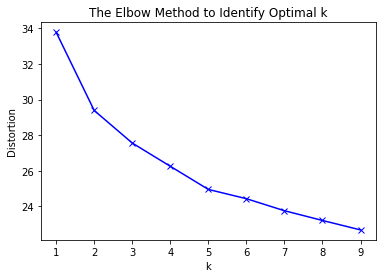

In [230]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tempdf)
    kmeanModel.fit(tempdf)
    distortions.append(sum(np.min(cdist(tempdf, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tempdf.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

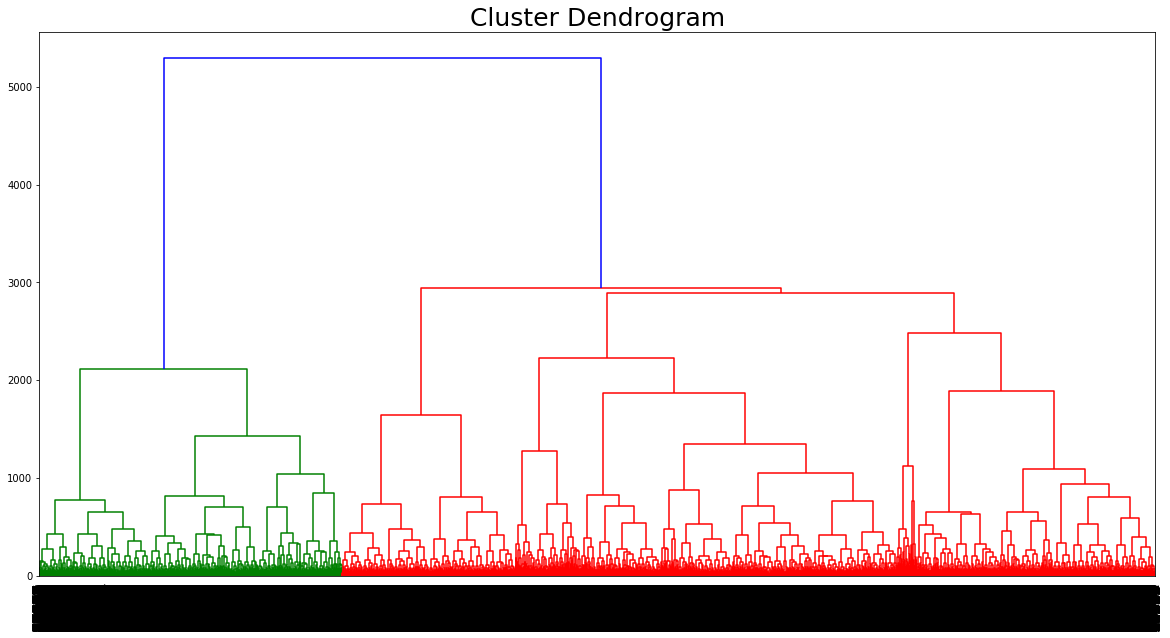

In [231]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(tempdf)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=tempdf.index)
plt.xticks(fontsize=15)
plt.show()   

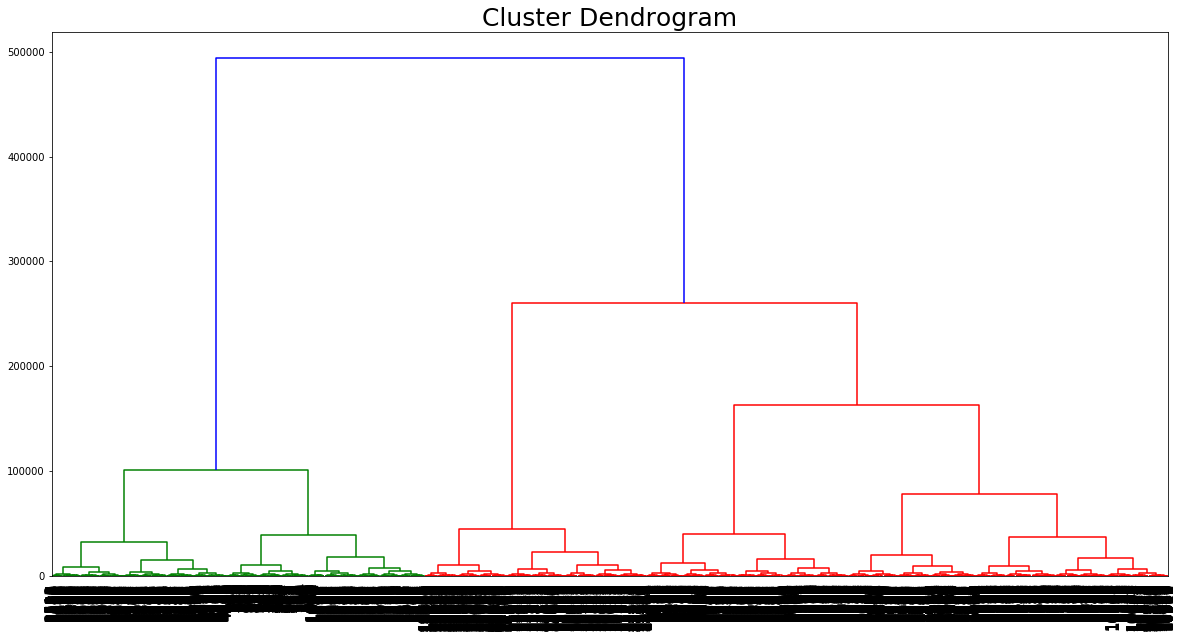

In [232]:
#from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix1 = ward(tempdf1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix1, orientation='top', labels=tempdf1.index)
plt.xticks(fontsize=15)
plt.show()  

In [141]:
""""for c,i in enumerate(a):
    print(str(c)+":"+str(i))
    print()"""

0:NorahHead

1:Nuriootpa

2:GoldCoast

3:Bendigo

4:Walpole

5:MelbourneAirport

6:Mildura

7:Williamtown

8:Watsonia

9:Nhil

10:MountGinini

11:Newcastle

12:BadgerysCreek

13:SydneyAirport

14:Tuggeranong

15:WaggaWagga

16:Hobart

17:Portland

18:AliceSprings

19:Brisbane

20:PerthAirport

21:Witchcliffe

22:Albany

23:Darwin

24:Ballarat

25:Canberra

26:MountGambier

27:Penrith

28:Townsville

29:Cairns

30:Sydney

31:Cobar

32:PearceRAAF

33:Adelaide

34:NorfolkIsland

35:Launceston

36:Woomera

37:Uluru

38:Albury

39:Dartmoor

40:SalmonGums

41:Richmond

42:Melbourne

43:CoffsHarbour

44:Perth

45:Wollongong

46:Moree

47:Sale

48:Katherine



In [234]:
tempdf.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,Locationint,WindGustDirint,WindDirint,RainTodayint,RainTomorrowint
0,18.9,23.7,0.0,5.17757,6.53058,41.0,28.0,55.0,1026.0,7.0,22.4,0,0,0,0,0
1,11.1,20.8,0.0,4.80000,8.30000,39.0,26.0,48.0,1014.4,7.0,19.5,1,1,1,0,1
2,15.9,19.5,17.6,5.17757,6.53058,44.0,9.0,99.0,1028.5,7.0,17.8,2,2,2,1,0
3,0.0,14.9,0.0,5.17757,6.53058,35.0,19.0,55.0,1023.0,4.0,14.2,3,3,3,0,0
4,9.1,22.7,0.0,5.17757,6.53058,41.0,7.0,40.0,1027.1,7.0,22.5,4,4,4,0,1


In [238]:
x=tempdf.drop(["RainTomorrowint"],axis=1)

In [239]:
y=tempdf.RainTomorrowint

In [240]:
clf=DecisionTreeClassifier()

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(f"train data size is {x_train.shape}")

train data size is (36384, 15)


In [243]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [244]:
y_pred = clf.predict(x_test)
clf.tree_.max_depth

44

In [245]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100)}%")

Accuracy: 71.0%


In [247]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                 

In [248]:
print(grid.best_score_)

0.7579705364995603


In [249]:
for hps, values in grid.best_params_.items():
  print(f"{hps}: {values}")

criterion: entropy
max_depth: 10
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 2


In [254]:
num_vars = tempdf.select_dtypes(['int64', 'float64']).columns
x = tempdf[num_vars]
x=tempdf.drop(["RainTomorrowint"],axis=1)
y = tempdf.RainTomorrowint
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [255]:
y_pred = clf.predict(x_test)

# Performance Reporting

In [256]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy: 71.28%


In [257]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion.columns.name = "Pred"
df_confusion

Pred,0,1
RainTomorrowint,,
0,5421,2270
1,2209,5694


In [258]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      7691
           1       0.71      0.72      0.72      7903

    accuracy                           0.71     15594
   macro avg       0.71      0.71      0.71     15594
weighted avg       0.71      0.71      0.71     15594



In [260]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20, 30],
              'max_depth': [4, 5, 6, 10, 15, 20],
              'min_samples_leaf': [ 1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10, 15, 20],
                

In [261]:
bstrap = ShuffleSplit(n_splits=10, test_size=0.3, random_state=16)
grid_bstrap = GridSearchCV(clf, param_grid, cv=bstrap)
grid_bstrap.fit(x_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=16, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'en

# Hyperparameters for Best Performing Model

In [262]:
print(f"Accuracy: {round(grid_bstrap.best_score_*100, 2)}%")

Accuracy: 75.8%


In [263]:
for key, value in grid_bstrap.best_params_.items():
  print(f"Hyperparameter: {key}; Value: {value}")

Hyperparameter: criterion; Value: gini
Hyperparameter: max_depth; Value: 5
Hyperparameter: max_leaf_nodes; Value: 20
Hyperparameter: min_samples_leaf; Value: 1
Hyperparameter: min_samples_split; Value: 2


# Leave One Out Method

In [ ]:
loocv = LeaveOneOut()
lv_score = cross_val_score(clf, x, y, cv=loocv)
lv_score.mean()